In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 
!pip install plotly 
import plotly.express as px  
import plotly.graph_objects as go 

In [30]:
url = 'https://raw.githubusercontent.com/noyaks/Our-project/main/Engineering_graduate_salary.csv'
pj = pd.read_csv(url)
pj.shape

(2998, 34)

In [19]:
GraduationYear = pj["GraduationYear"].unique()
sorted(GraduationYear)

[0, 2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

בדקנו בחקירת הדאטה בהתחלה וראינו שיש רק בן אדם שיש אצלו 0 בשנה, לא משמעותי ולכן נתעלם ממנו

In [20]:
graduation_year_column = 'GraduationYear'
salary_column = 'Salary'
data_filtered = pj[pj[graduation_year_column] > 0]
average_salary = data_filtered.groupby(graduation_year_column)[salary_column].mean().astype(int).reset_index()
average_salary.columns = ['Graduation Year', 'Average Salary']
average_salary

,Graduation Year,Average Salary
0,2007,120000
1,2009,310312
2,2010,442476
3,2011,367971
4,2012,317168
5,2013,274297
6,2014,262971
7,2015,304531
8,2016,335000
9,2017,209285


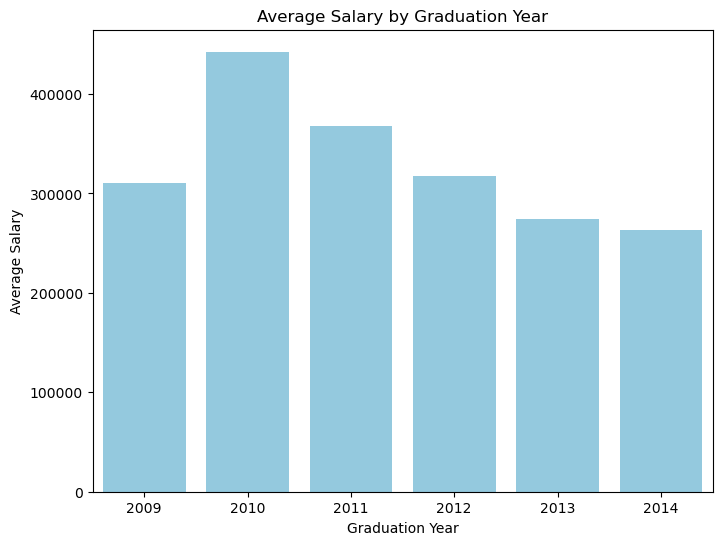

In [21]:
years = [2009, 2010, 2011, 2012, 2013, 2014]
# (סינון השנים הרלוונטיות למגמה שאנו חוקרות)
data = pj[pj['GraduationYear'].isin(years)]
avg_salary = data.groupby('GraduationYear')['Salary'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='GraduationYear', y='Salary', data=avg_salary, color='#87CEEB')
plt.xlabel('Graduation Year')
plt.ylabel('Average Salary')
plt.title('Average Salary by Graduation Year')
plt.xticks(rotation=0)
plt.show()

ניתן לראות כי ישנה עלייה חדה בממוצע השכר המוצע בשנת 2010 ומשם הממוצע רק יורד, וזאת בניגוד למה שציפינו-<br>
שממוצע המשכורות יעלה עם השנים ככל שהתעשייה מתפתחת.<br>
ניסינו להבין מה הסיבה לעלייה בשנת 2010<br>
לאחר מחקר באינטרנט על המצב הכלכלי בהודו, ראינו כי התמ"ג ההודי היה במקפצה של 8.5% מהשנה הקודמת, המקפצה הכי גבוהה בטווח השנים אותו אנו חוקרות,<br>
מה שיכול להסביר את הממצאים מהגרף.<br>
נתעמק כעת בשנת 2010

## External source

(נתון רשמי של התמ"ג ההודי לפי שנים (הטבלה מטה.<br>
[GDP of India](https://www.forbesindia.com/article/explainers/gdp-india/85337/1)

In [23]:
data_2010 = pj[pj['GraduationYear'] == 2010]
average_salary = data_2010.groupby('Specialization')['Salary'].mean().astype(int).reset_index()
student_num = data_2010.groupby('Specialization').size()
specializations = student_num[student_num > 10].index
average_salary= average_salary[average_salary['Specialization'].isin(specializations)]
average_salary = average_salary.sort_values('Salary', ascending=False).reset_index(drop=True)
average_salary.head()

,Specialization,Salary
0,mechanical engineering,671923
1,computer application,565937
2,computer engineering,503189
3,information technology,423823
4,electronics and communication engineering,384900


לאחר שראינו שממוצע המשכורות ב2010 הוא הגבוה ביותר, נרצה להתמקד בתהתמחויות עם המשכורות הגבוהות ביותר.<br>
בגלל שישנן המון התמחויות, ולעתים שמות שונים שמתארים אותה התמחות ואף סטודנטים בודדים בהתמחויות מסוימות,<br>
בדקנו מה התארים הדומיננטיים הן מבחינת שכר והן מבחינת כמות סטודנטים שסיימו.<br>
על כן פילחנו תארים בהם סיימו מעל 10 סטונדטים וסידרנו אותם על פי ממוצע משכורות מהגבוה לנמוך.<br>
הגענו לחמישה תארים דומיננטים שאותם נרצה לחקור.

C:\Users\noya_ks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\noya_ks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


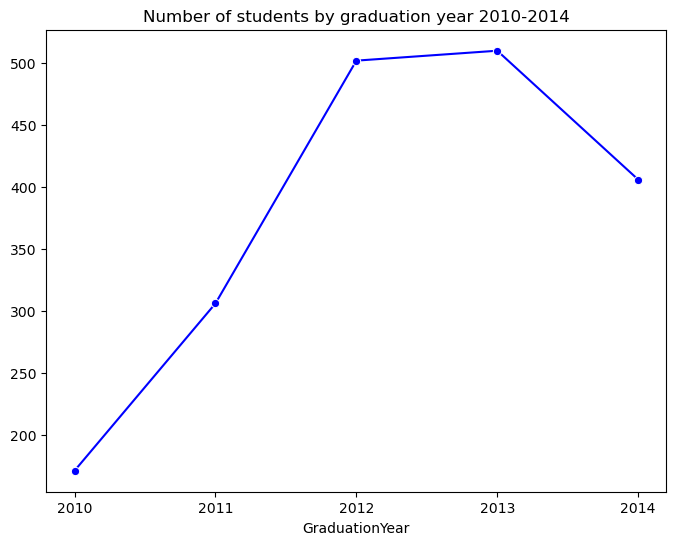

In [48]:
filtered_data = pj[(pj['GraduationYear'].isin(range(2010, 2015))) & (pj['Specialization'].isin(relevant_specializations))]
filtered_graduation_counts = filtered_data['GraduationYear'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
filtered_line_plot = sns.lineplot(x=filtered_graduation_counts.index, y=filtered_graduation_counts.values, marker='o', color='blue')
plt.title('Number of students by graduation year 2010-2014')
plt.xticks(range(2010, 2015))
plt.show()

מהגרף ניתן לראות כי החל משנת 2010 ישנה עלייה בכמות הסטודנטים אשר סיימו את התואר ולאחר מכן ישנה ירידה<br>
בכדי להבין את המגמה טוב יותר, רצינו לראות את שינוי כמות הסטונדטים משנה לשנה באחוזים

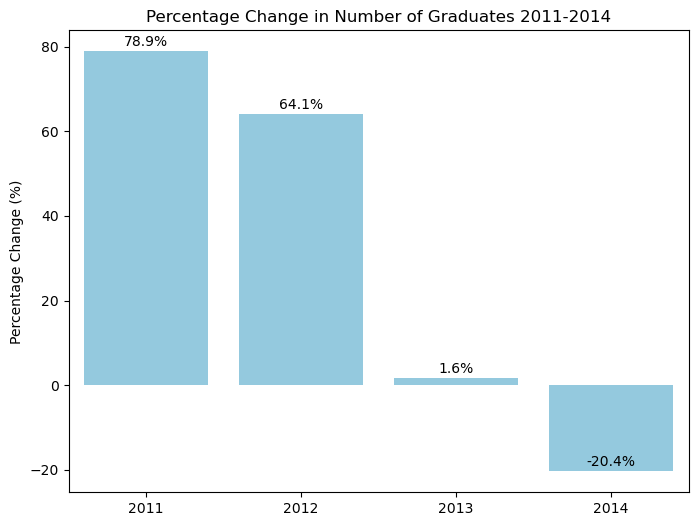

In [45]:
years = range(2011, 2015)
percentage_changes = []
for year in years: 
    current_year_data = pj[(pj['GraduationYear'] == year) & (pj['Specialization'].isin(relevant_specializations))]
    previous_year_data = pj[(pj['GraduationYear'] == year - 1) & (pj['Specialization'].isin(relevant_specializations))]
    total_students_current = current_year_data.shape[0]
    total_students_previous = previous_year_data.shape[0]
    percentage_change = ((total_students_current - total_students_previous) / total_students_previous) * 100
    percentage_changes.append(percentage_change)
years = pd.Series(years)
plt.figure(figsize=(8, 6))
sns.barplot(x=years, y=percentage_changes, color='skyblue')
for i, percentage in enumerate(percentage_changes):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Percentage Change in Number of Graduates 2011-2014')
plt.ylabel('Percentage Change (%)')
plt.show()

## Graph findings

ניתן לראות מהגרף כי משנת 2010 לשנת 2011 ישנה עלייה של 79%! בכמות הסטונדטים שמסיימים את התואר<br>
לאחר מכן, ישנה עלייה אך העלייה מתמתנת<br>
ולבסוף, ישנה ירידה של 20% בכמות הסטודנטים<br>
(יצאנו מנקודת הנחה כי כמות הסטודנטים המתחילים תואר היא פחות או יותר שווה בין שנה לשנה)<br>
נתון זה הוא נתון מפתיע, הרי ככל שהתעשייה מתפתחת, ישנו צורך ביותר מהנדסים ומתכנתים<br>
ולכן ציפינו לראות עלייה בגרף עם השנים

# Observation 2

לפי גרף ממוצע המשכורות בשוק לפי שנים, ראינו כי הממוצע היה בשיאו בשנת 2010 ולאחר מכן היה בירידה.<br>
לפי גרף כמות הסטודנטים לפי שנים, ראינו כי לאחר שנת 2010 הייתה עלייה משמעותית ומשם היא התמתנה עד שהגיעה לירידה<br>
כלומר, מתכלול הגרפים והנתונים, כאשר ממוצע המשכורות היה בשיאו, הייתה לאחר מכן עלייה בכמות הסטודנטים.<br>
וכאשר הייתה ירידה בממוצע המשכורות, העלייה התמתנה עם השנים והפכה לירידה.<br>
מכאן, הגענו למסקנה, כי ישנו קשר ישיר בין ממוצע המשכורות בשוק לכמות הסטודנטים שיסיימו את התואר בשנים הבאות, הרי כאשר סטודנט רואה שישנה עליה בשכר בשוק,<br>
יש לו יותר מוטיבציה ורצון לסיים את התואר בהצלחה.